In [ ]:
! cp drive/My\ Drive/Colab\ Notebooks/*.csv ./
! cp drive/My\ Drive/Colab\ Notebooks/*.pkl ./

In [ ]:
import pandas as pd

df = pd.read_csv('dankmemes_task1_train.csv')

In [ ]:
import pickle

X = pickle.load(open('bert_embeddings.pkl', 'rb'))

In [ ]:
import numpy as np

y = df[['Meme']].values

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
ds_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds_valid = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
def build_model(input_shape=(None, 768)):
  model = tf.keras.Sequential([tf.keras.layers.Dense(768, 
                                                     name='dense_1',
                                                     activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(256, 
                                                     name='dense_2',
                                                     activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(64, 
                                                     name='dense_3',
                                                     activation=tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, name='output',
                                                     activation=tf.keras.activations.sigmoid)])
  print(model.compute_output_shape(input_shape=input_shape))
  model.build(input_shape=input_shape)
  return model

In [ ]:
buffer_size = 10000
batch_size = 32
num_epochs = 75

ds_train = ds_train.shuffle(buffer_size=buffer_size,
                            reshuffle_each_iteration=False)
ds_valid = ds_valid.batch(batch_size)
ds_train = ds_train.batch(batch_size)

In [ ]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

(None, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  590592    
_________________________________________________________________
dense_2 (Dense)              multiple                  196864    
_________________________________________________________________
dense_3 (Dense)              multiple                  16448     
_________________________________________________________________
output (Dense)               multiple                  65        
Total params: 803,969
Trainable params: 803,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', patience=5)
hist = model.fit(ds_train,
                 validation_data=ds_valid,
                 epochs=num_epochs,
                 batch_size=batch_size)

Epoch 1/75

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 93ms/step - loss: 0.7160 - binary_accuracy: 0.5055 - val_loss: 0.7009 - val_binary_accuracy: 0.4406
Epoch 2/75
2/2 [==============================] - 0s 21ms/step - loss: 0.6895 - binary_accuracy: 0.5492 - val_loss: 0.6913 - val_binary_accuracy: 0.5250
Epoch 3/75
2/2 [==============================] - 0s 21ms/step - loss: 0.6910 - binary_accuracy: 0.5203 - val_loss: 0.6967 - val_binary_accuracy: 0.4750
Epoch 4/75
2/2 [==============================] -

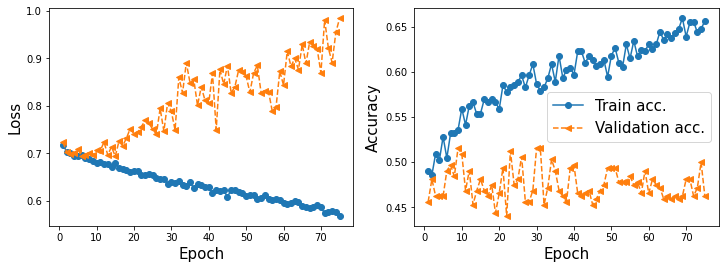

In [ ]:
import matplotlib.pyplot as plt

history = hist.history
x_arr = np.arange(len(history['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, history['loss'], '-o', label='Train loss')
ax.plot(x_arr, history['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, history['binary_accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, history['val_binary_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()